We will examine the effect of reducing dimension of hoda data on precision and train time of KNN classifier


In [1]:
! wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat -P ./dataset
! wget https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py

--2025-07-02 14:07:55--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2025-07-02 14:07:55--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘./dataset/Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.04s   

2025-

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from dataset import load_hoda

In [3]:
knnClassifier = KNeighborsClassifier(n_neighbors=3)
X_train, y_train, X_test, y_test = load_hoda(size=25)

In [4]:
from time import time

tic = time()
knnClassifier.fit(X_train, y_train)
tac = time()
print(f'Training time: {tac-tic:.4f}')
score = knnClassifier.score(X_test, y_test)
print(f'Accuracy on test {score*100:.2f}')

Training time: 0.0095
Accuracy on test 95.50


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
knnClassifier_PCA = KNeighborsClassifier(n_neighbors=3)

tic = time()
knnClassifier_PCA.fit(X_train_pca, y_train)
tac = time()
print(f'Training time: {tac-tic:.4f}')
score = knnClassifier_PCA.score(X_test_pca, y_test)
print(f'Accuracy on test {score*100:.2f}')

Training time: 0.0171
Accuracy on test 92.00


We see that the accuracy decreases with dimension reduction, with no gain in speed!

Next, we will classify texts from stack overflow using SVM Classifier.

In [7]:
! wget https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz
! tar -xzf stack_overflow_16k.tar.gz

--2025-07-02 14:08:03--  https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6053168 (5.8M) [application/x-gzip]
Saving to: ‘stack_overflow_16k.tar.gz’

stack_overflow_16k. 100%[===================>]   5.77M  7.48MB/s    in 0.8s    

2025-07-02 14:08:05 (7.48 MB/s) - ‘stack_overflow_16k.tar.gz’ saved [6053168/6053168]



In [8]:
import os

data = {}

for dir in ['train', 'test']:
  data[dir] = {}
  for folder in os.listdir(dir):
    data[dir][folder] = []
    for file in os.listdir(os.path.join(dir, folder)):
      with open(os.path.join(dir, folder, file)) as f:
        data[dir][folder].append(f.read())


In [9]:
data['train'].keys()

dict_keys(['java', 'javascript', 'python', 'csharp'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit([txt for category in data['train'].values() for txt in category])

print("Vocabulary:", vectorizer.vocabulary_)

Vocabulary: {'make': 30875, 'threads': 49060, 'list': 29850, 'item': 27755, 'new': 33842, 'blank': 9737, 'concurrency': 13526, 'really': 40490, 'comfortable': 13199, 'examples': 19422, 'provided': 39321, 'docs': 17312, 'trying': 50226, 'database': 15381, 'employers': 18629, 'retrieve': 41643, 'credentials': 14624, 'store': 46703, 'util': 51704, 'want': 52719, 'perform': 37319, 'independent': 26345, 'actions': 6457, 'employee': 18597, 'stored': 46710, 'concurrently': 13531, 'multi': 32793, 'threading': 49050, 'right': 41854, 'direction': 16879, 'guided': 24283, 'pseudo': 39377, 'example': 19405, 'question': 39830, 'vague': 51795, 'comment': 13229, 'improve': 26183, 'downvote': 17600, 'important': 26158, 'understand': 50847, 'accomplish': 6300, 'thanks': 48791, 'does': 17360, 'number': 34893, 'correctly': 14160, 'run': 42275, 'program': 39085, 'going': 23834, 'automate': 8688, 'famous': 20042, 'song': 45542, '99': 5254, 'bottles': 10150, 'xxx': 54155, 'wall': 52704, 'print': 38665, 'lyri

In [11]:
from sklearn.svm import SVC

Classifier = SVC()
classes = list(data['train'].keys())
Classifier.fit(vectorizer.transform([txt for category in data['train'].values() for txt in category]),
                  [category for category in [0, 1, 2, 3] for _ in data['train'][classes[category]]])


SVC()

In [12]:
classes = list(data['test'].keys())
Classifier.score(vectorizer.transform([txt for category in data['test'].values() for txt in category]),
                    [category for category in [0, 1, 2, 3] for _ in data['test'][classes[category]]])

0.795

Taking 10 samples from 3 classes of stack overflow data.

In [13]:
sample = {}
for i in range(3):
  sample[i] = []
  for j in range(10):
    sample[i].append(data['test'][classes[i]][j])

In [14]:
correct = 0
wrong = 0

for lable, txt_list in sample.items():
  for txt in txt_list:
    pred = Classifier.predict(vectorizer.transform([txt]))
    if pred == lable:
      correct += 1
    else:
      wrong += 1

print(f'Correct: {correct}')
print(f'Wrong: {wrong}')

Correct: 25
Wrong: 5


Applying 2-component PCA on the samples for visualization.

In [15]:
from sklearn.decomposition import PCA

sample_vec = vectorizer.transform([txt for category in sample.values() for txt in category])
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vec)

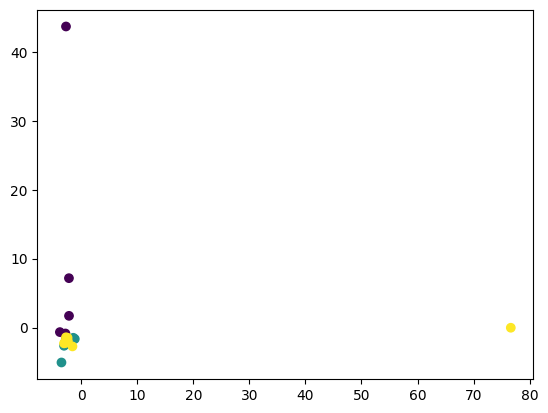

In [16]:
import matplotlib.pyplot as plt

plt.scatter(result[:, 0], result[:, 1], c=[category for category in [0, 1, 2] for _ in sample[category]])
plt.show()

We see that the samples are not separable in their two-dimensional representation.